### 전동킥보드에 대한 네이버 뉴스 글 스크래핑

In [55]:
import urllib.request
import json

client_key = 'izGsqP2exeThwwEUVU3x'
client_secret = 'WrwbQ1l6ZI'
query = '전동킥보드'
encText = urllib.parse.quote_plus(query)

num = 100
naver_url = 'https://openapi.naver.com/v1/search/news.json?query=' + encText + '&display=' + str(num)

request = urllib.request.Request(naver_url)
request.add_header("X-Naver-Client-Id",client_key)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)

rescode = response.getcode()

news = []

if(rescode == 200):
    response_body = response.read()
    dataList = json.loads(response_body)
    count = 1
    for data in dataList['items'] :
        news.append(data['title'])
        news.append(data['description'])
#         print (str(count) + ' : ' + data['title'])
#         print ('[' + data['description'] + ']')
        count += 1
else:
    print('오류 코드 : ' + rescode)

In [56]:
import re

mylist = []
for t in news:
    t = re.sub('[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#△◇◆▶▲$%【】&\\\=\(\'\"]','',t)
    mylist.append(t)
    # print(t)

wfile = open("data/news.txt","w", encoding="utf-8") 
wfile.writelines(mylist) 
wfile.close()

In [62]:
from konlpy.tag import Komoran
from collections import Counter
from PIL import Image   
from wordcloud import WordCloud
import pandas as pd
import numpy as np 

file = open("./data/news.txt", 'r', encoding="utf-8") 
lists = file.read()
#print(lists)

komoran = Komoran()
nouns = komoran.nouns(lists)
count = Counter(nouns)
#print(count)

In [71]:
del(count['킥'])
del(count['전동'])
del(count['보드'])
del(count['무등산'])
del(count['릉'])
del(count['등'])
del(count['메'])
del(count['코'])
del(count['리아'])
del(count['세'])
del(count['건'])
del(count['개'])
del(count['일'])

In [72]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import matplotlib
font_path = "data/210 굴림050.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
print(plt.rcParams['font.family'])
matplotlib.font_manager._rebuild()
matplotlib.rcParams['axes.unicode_minus'] = False

['210 Gulim']


In [87]:
wordcloud = WordCloud(  
    font_path = "./data/210 굴림050.ttf",
    background_color = 'white',
    colormap = 'coolwarm',
    mask = np.array(Image.open('./data/kick-scooter.png')),
    width = 700,
    height = 500
)

wordcloud = wordcloud.generate_from_frequencies(count)
wordcloud.to_file('data/wordcloud.png')

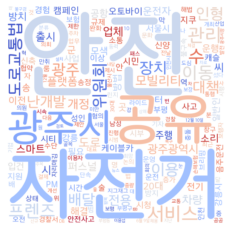

In [88]:
fig = plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [120]:
scooter = np.array(Image.open('./data/scooter.png'))

for i in range(len(scooter)):
    for j in range(len(scooter[i])):
        if scooter[i][j]==0:
            scooter[i][j] = 255

In [129]:
wordcloud2 = WordCloud(  
    font_path = "./data/210 굴림050.ttf",
    background_color = 'white',
    colormap = 'twilight',
    mask = scooter,
    width = 700,
    height = 500
)

wordcloud2 = wordcloud2.generate_from_frequencies(count)
wordcloud2.to_file('data/wordcloud_scooter.png')

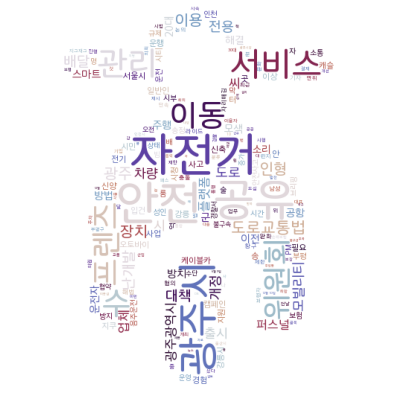

In [130]:
plt.figure(figsize=(7, 7))
plt.axis('off')
plt.imshow(wordcloud2)
plt.show()